#  Object classification for self-driving cars

### Date Created: 03-Feb-2020

### Date Modified: 18-Feb-2020

### Description: This is a notebook with the entire workflow of street object classification for self-driving cars using PyTorch and Fastai. The algorithm takes input images from streets and clarifies them into one of the 9 output classes like car, pedestrian, animal, stop sign, school ahead, red signal etc.

In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
from fastai.vision import *
from fastai.metrics import error_rate

### Here we defined the batch size as 10

In [19]:
bs = 10

In [20]:
path = '/home/riya/datasets/road_object_classification/train2'


In [21]:
!ls $path

animal	green_signal  no_entry_board  red_signal	 stop_sign_board
car	models	      pedestrian      school_sign_board  yellow_signal


In [22]:
os.path.join(path,'animal')

'/home/riya/datasets/road_object_classification/train2/animal'

In [23]:
fnames=get_image_files(os.path.join(path,'animal'))
fnames[:5]

[PosixPath('/home/riya/datasets/road_object_classification/train2/animal/tmg-article_tall;jpeg_quality=20.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train2/animal/anim.jpeg'),
 PosixPath('/home/riya/datasets/road_object_classification/train2/animal/1000-road-toll-01.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train2/animal/Dead-Bear-on-I-70-near-Eagle-credit-Shane-Macomber-Vail-Daily.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train2/animal/nature-3067976_960_720.jpg')]

In [24]:
data = ImageDataBunch.from_folder('/home/riya/datasets/road_object_classification', train="train2", valid="valid2",
        ds_tfms=get_transforms(),bs=bs,size=224,num_workers=2).normalize(imagenet_stats)


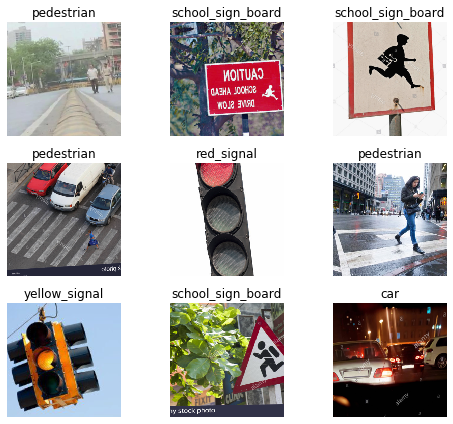

In [25]:
data.show_batch(rows=3, figsize=(7,6))

In [26]:
print(data.classes)
len(data.classes),data.c

['animal', 'car', 'green_signal', 'no_entry_board', 'pedestrian', 'red_signal', 'school_sign_board', 'stop_sign_board', 'yellow_signal']


(9, 9)

In [27]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

### The information given below is the information about the model we use,here the model starts learning.

In [32]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


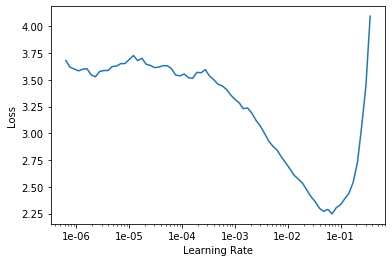

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.979614,1.364853,0.511111,00:33
1,1.989633,0.925085,0.711111,00:32
2,1.351028,0.768751,0.822222,00:33
3,1.032454,0.689977,0.822222,00:32
4,0.783890,0.710977,0.822222,00:31
5,0.631437,0.690420,0.844444,00:32


In [36]:
learn.save('stage-1')

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

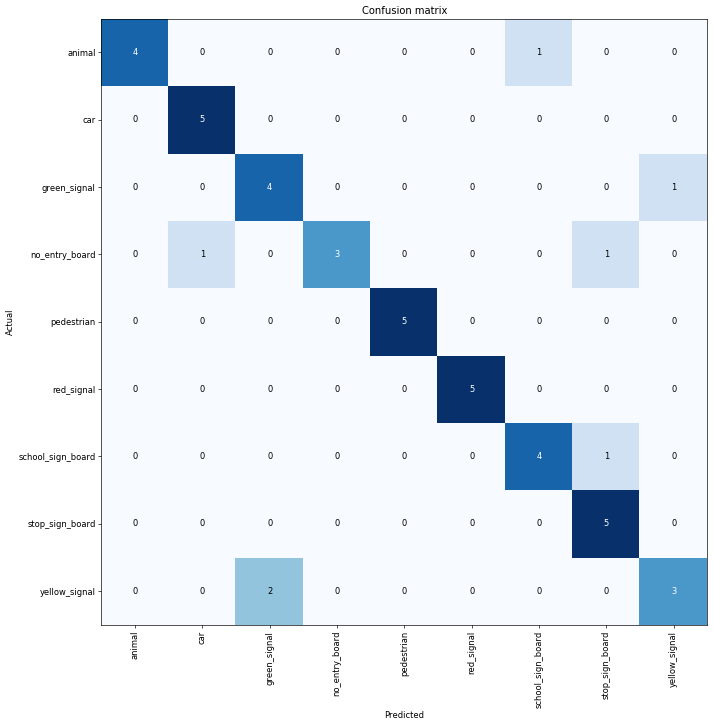

In [38]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

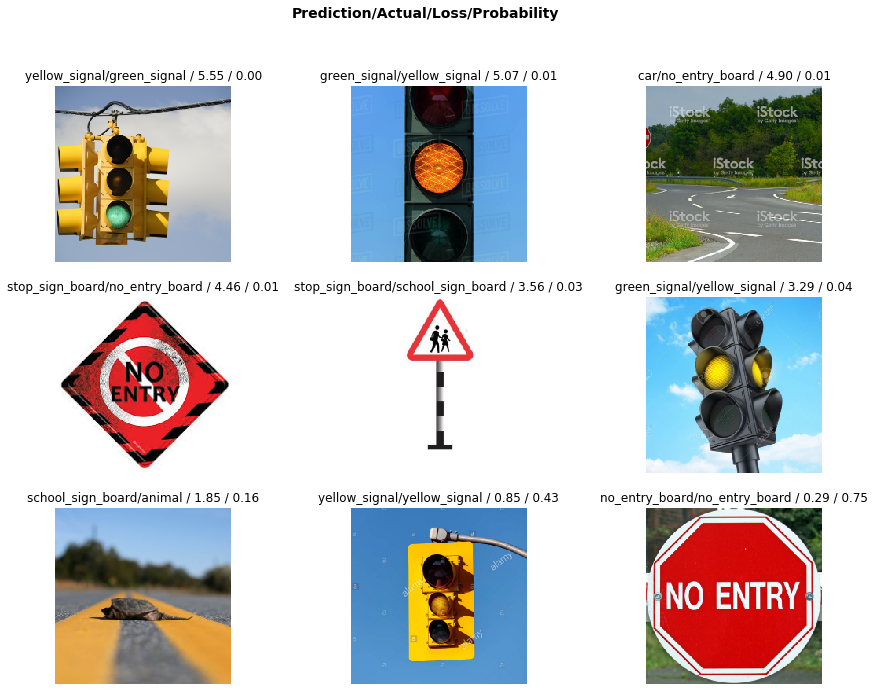

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


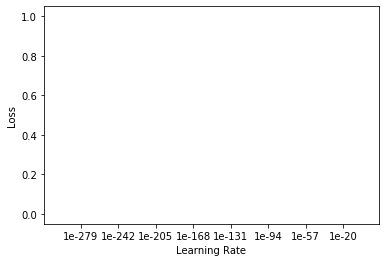

In [42]:
learn.recorder.plot()

### That's a pretty accurate model!

In [43]:
learn.fit_one_cycle(7, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.519990,0.597381,0.844444,00:43
1,0.387142,0.606817,0.844444,00:43
2,0.339633,0.682002,0.800000,00:43
3,0.333708,0.677666,0.844444,00:43
4,0.292146,0.752467,0.777778,00:43
5,0.284751,0.655563,0.800000,00:43
6,0.272423,0.677196,0.800000,00:44


In [44]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

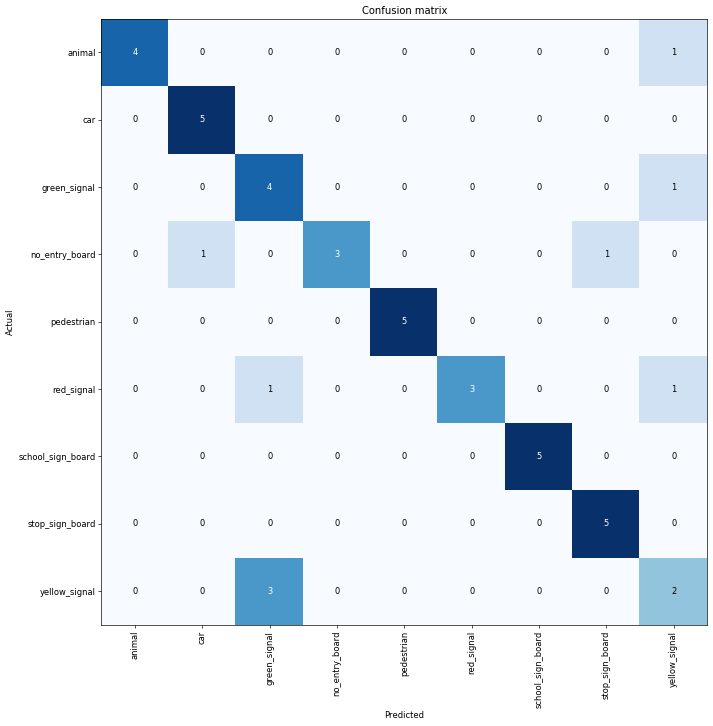

In [45]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

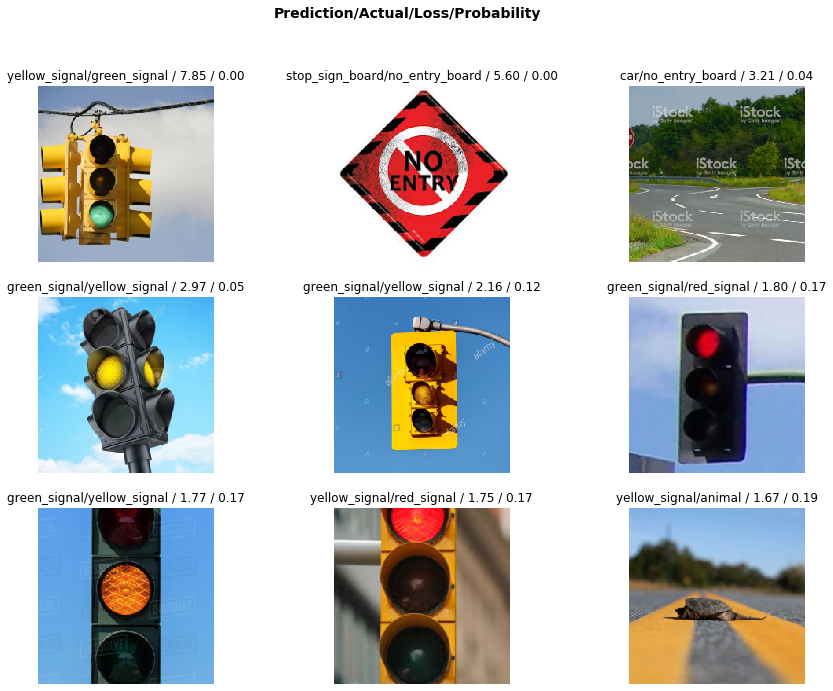

In [46]:
interp.plot_top_losses(9, figsize=(15,11))